# Central Limit Theorem

## Introduction

This is a matplotlip example that visualizes the [**Central Limit Theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem). This states that the sum of any independent random variables converges towards a normal distribution (under proper normalization). It is **not** required that the individual variables are normally distributed.

Let's visualize this with a simple interactive *matplotlib* figure.



We'll import *NumPy* and *matplotlib* and use two of the "magic Jupyter commands" to inline plots in a ```.svg``` vector format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

We can easily generate a huge array of (uniform) random variables with *NumPy*:

In [2]:
samples = np.random.uniform(size=10)
print(samples)

[ 0.54944795  0.92650864  0.59088744  0.47189959  0.96247548  0.77564205
  0.03783223  0.49956983  0.64223996  0.59079578]


Let's plot such a distribution with a histogram:

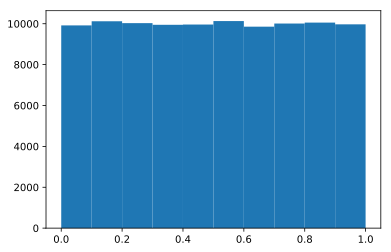

In [3]:
plt.hist(np.random.uniform(size=100000))
plt.show()

Useful parameters for histograms are:
* *```normed```* to get a normalized output
* *```bins```* to specify the number of bins

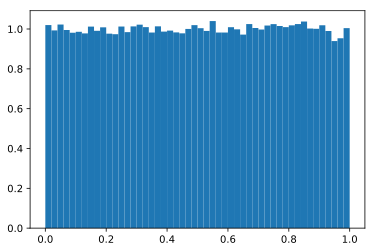

In [4]:
plt.hist(np.random.uniform(size=100000), bins=50, normed=True)
plt.show()

To check the *central limit theorem* however, we need to consider the distribution of the **sums** of many random variables. This is also easy in NumPy by generating a 2d-array (or a matrix) of random values and then summing over one of the dimensions.
Let's do the sum of $n$ random variables. For large $n$, it should converge to a normal distribution!

[ 5.92765639  4.65307181  4.61847661 ...,  5.98481022  4.83049086
  6.14869849]


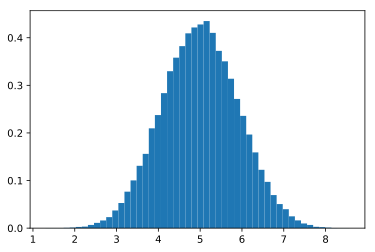

In [5]:
n = 10
samples = np.random.uniform(size=(100000, n))
sums = np.sum(samples, axis=1)
print(sums)

plt.hist(sums, bins=50, normed=True)
plt.show()

Let's add a title and make the figure interactive so we can play with $n$.

We import another module that enables interactivity, and then wrap the cell above into a function that has a *```@interact```* decorator.

In [6]:
from ipywidgets import interact

@interact(n=(1, 20))
def central_limit_theorem(n=1):  # Default parameter is also default slider position
    # Look at the sum of n realizations of sampling many random numbers from any distribution (here uniform)
    samples = np.random.uniform(size=(100000, n))
    sums = np.sum(samples, axis=1)
    
    # Plot normalized histogram
    plt.hist(sums, bins=50, normed=True)
    
    # Set a title
    plt.title("Central limit theorem")
    
    # Display the figure
    plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


To verify that the samples are indeed normally distributed, we can also overlay a true normal distribution.
This is given by:

$$f(x \; | \; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

In [7]:
def normal_distr(x, mu, sigma):
    return 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp( -(x - mu)**2 / (2 * sigma**2))

In [8]:
from ipywidgets import interact

@interact(n=(1, 20))
def central_limit_theorem(n=1):
    # Look at the sum of n realizations of sampling many random numbers from any distribution (here uniform)
    samples = np.random.uniform(size=(100000, n))
    sums = np.sum(samples, axis=1)

    # Plot normalized histogram & extract the x position of the bins
    _, x, _ = plt.hist(sums, bins=50, normed=True)
    
    # Estimate parameters for normal distribution
    mu = np.mean(sums)
    sigma = np.std(sums)
    
    # Plot corresponding normal distribution
    y = normal_distr(x, mu, sigma)
    plt.plot(x, y, linewidth=2, color='red', linestyle='--')
    
    # Set a title
    plt.title("Central limit theorem")
    
    # Display the figure
    plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


Finally, let's add a legend by adding labels to both the *```hist```* and *```plot```* commands:

In [9]:
from ipywidgets import interact

@interact(n=(1, 20))
def central_limit_theorem(n=1):
    # Look at the sum of n realizations of sampling many random numbers from any distribution (here uniform)
    samples = np.random.uniform(size=(100000, n))
    sums = np.sum(samples, axis=1)
    
    # Plot normalized histogram & extract the x position of the bins
    _, x, _ = plt.hist(sums, bins=50, normed=True, label='Approximation')
    
    # Estimate parameters for normal distribution
    mu = np.mean(sums)
    sigma = np.std(sums)
    
    # Plot corresponding normal distribution
    y = normal_distr(x, mu, sigma)
    plt.plot(x, y, linewidth=2, color='red', linestyle='--', label='Normal distribution')
    
    # Set a title
    plt.title("Central limit theorem")
    
    # Add a legend
    plt.legend(loc='upper left')
    
    # Display the figure
    plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.
